# Part I - (Communicate Data Finding : Ford GoBike System Data)
## by (Oni Oluwasegun Yemi)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.


## Preliminary Wrangling

The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data.  
The Data Set focuses on information with regard to the individual rides undertaken in a bike-sharing system expanded over the greater San Francisco Bay Area. 

>The Features included in the Data are as follows :
    - Member Year of Birth
    - Member Gender
    - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Trip Duration(in seconds)
    - Bike ID
    - Start Time and Date
    - End Time and Date
    - Start Station ID
    - End Station ID
    - Start Station Name
    - End Station Name
    - End Station Latitude
    - End Station Longitude
    - Start Station Latitude
    - Start Station Longitude



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
##Loading the dataset 
bike = pd.read_csv("201902-fordgobike-tripdata.csv")
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
## Cheking the Loan dataset info 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

From the dataset information obtained above, the dataset consisted of 16 varibales and a total of 183412 observations. There are 9 numerics data type and 7 strings or object data type.

In [4]:
## Ching the shape of the dataset
print(bike.shape)

(183412, 16)


In [5]:
## Cheking for missing values 
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
## checking for duplicates 
bike.duplicated().sum()

0

**The dataset conatins some data quality issues which needs to be cleaned.**
* improper datatype for variables like: start_time,end_time, start_station_id,end_station_id,and member_birth_year
* Missing values 

#### Data Cleaning

In [3]:
## Change the data type for start_time and end_time from object to datetime 
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [4]:
## Filling up missing values 
bike['start_station_id'].fillna(0, inplace=True)
bike['end_station_id'].fillna(0, inplace=True)
bike['member_birth_year'].fillna(0, inplace=True)

In [5]:
## Change the data type of start_station_id and end_station_id and member_birth_year from float to int
bike['start_station_id'] = bike['start_station_id'].astype('int64')
bike['end_station_id'] = bike['end_station_id'].astype('int64')
bike['member_birth_year'] = bike['member_birth_year'].astype('int64')

In [10]:
##To test the changes 
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### What is the structure of your dataset?
There are 183412 bike trip with 16 variables. 2 datetimes, 9 numerics and 5 strings. 


### What is/are the main feature(s) of interest in your dataset?

* I'm interested in exploring the ride frequency based on diferent attributes in the dataset.
* To examine the demographics of the Ford GoBike Riders 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest? 

Attributes like user type, gender, age, station route, and date(days, month, hours) will be used on ride duration. 

## Univariate Exploration

#### I will start by exploring the distribution of the target variable: Duration

In [6]:
plt.style.use('seaborn-whitegrid')
#plt.style.available

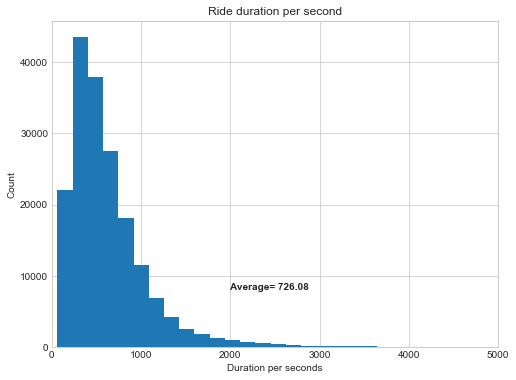

In [12]:
## Distribution plot of the bike duration per seconds 
mean=bike['duration_sec'].mean()
binsize = 500
bins = np.arange(0, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize =[8,6])
plt.hist(data= bike, x= 'duration_sec', bins=binsize)
plt.title('Ride duration per second')
plt.annotate('Average= %.2f'%(mean), xy = (2000,8000), 
             fontsize = 10, fontweight='bold')
plt.xlabel('Duration per seconds')
plt.ylabel('Count')
plt.xlim(0,5000);

### interpretation
It can be observed from the histogram plot that the ride distribution per seconds is rightly skewed with a long tail. The average duration per sec as shown on the histogram is 726.08. In oder to adjust the skeweness, I will proceed to visualizing the log transform of the bike duration per minutes. 

In [7]:
##Creating a new variable based on duration per minutes 
bike['duration_minutes'] = round(bike['duration_sec']/60,2)

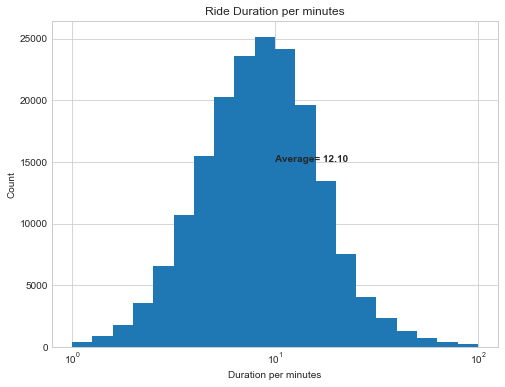

In [14]:
## Ride duration per minutes factored by gender 

mean=bike['duration_minutes'].mean()
binsize = 10**np.arange(0, 2+0.1, 0.1)
plt.figure(figsize =[8,6])
plt.hist(data= bike, x= 'duration_minutes', bins=binsize)
plt.title('Ride Duration per minutes')
plt.annotate('Average= %.2f'%(mean), xy = (10,15000), 
             fontsize = 10, fontweight='bold')
plt.xlabel('Duration per minutes')
plt.ylabel('Count')
plt.xscale("log");

### Interpretation
The use of a log-scale for the distribution of ride per minutes makes the dribution normal. The average trip duration per minutes is 12.1. 

#### The next is to examine the frequecy/percentage count of some of the categorical features 

In [15]:
## to obtain the frequency count for each gender levels 
gender_count=pd.Series(bike['member_gender'].value_counts())

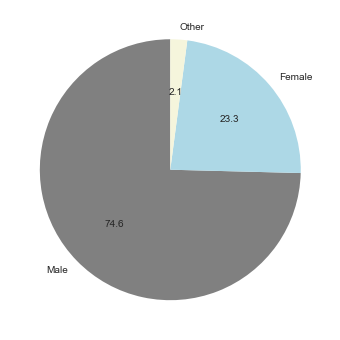

In [16]:
#Ploting the pie chart 
plt.figure(figsize=[8,6])
color = ['grey',"lightblue",'beige']
explode = [0,0,0.5]
plt.pie(x=gender_count,labels = gender_count.index,startangle=90, colors=color,autopct='%.1f');

### interpretation
The pie chart shows the distribution of bike riders gender. Majority (74.6%) are Male, 23.3% are female and about 2.1% belongs to other gender catrgory

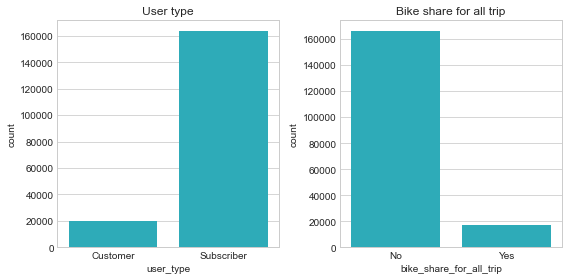

In [17]:
## obtaining the frequency plot for the other two categorical variables
fig, ax = plt.subplots(ncols=2, figsize = [8,4])
default_color = sb.color_palette()[9]
sb.countplot(data = bike, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = bike, x = 'bike_share_for_all_trip', color = default_color, ax = ax[1])
ax[0].set_title('User type')
ax[1].set_title('Bike share for all trip')
plt.tight_layout();

### Interpretation
The frequency count for User type and Bike share for all trip shows that majority of the riders are subcriber, and few customers. Also, tendency of No bike share for all trip was significantly higher than yes

#### To obtain the distribution of Age 

In [9]:
##Creating the age column by subtracting each members age from -
## 2019 which is the dataset retriever year
## Writing a function that returns the calculation
def age(col):
    if col==0:
        return 0
    else:
        return 2019-col

In [10]:
### Applying the function on the birth year column
bike['member_age']= bike['member_birth_year'].apply(age)
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,NaN,No,708.68,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.90,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.17,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.42,45


In [11]:
## Removing all records of zero from the Age 
bike_copy = bike.query('member_age!=0')

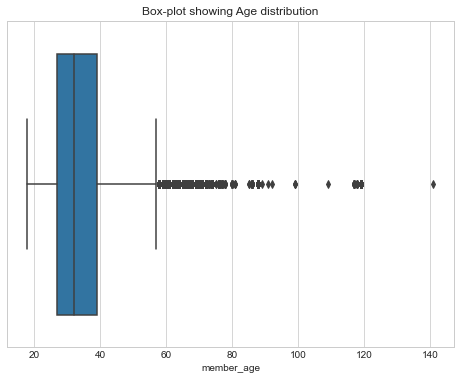

In [21]:
##Visualizing the distribution of the members age 
plt.figure(figsize=[8,6])
sb.boxplot(x=bike_copy['member_age'])
plt.title('Box-plot showing Age distribution');

### Interpretaion
It can be observed from the boxplot that the median member's age is between 20-40 years, the maximum age is close to 60 years. There are gross numer of outliers in the age distribution. The outliers will be corrected using the inter-quartile range approach and the chart will be reproduced. 

In [22]:
##Removing outliers from the age column using inter-quartile range 

Q1 = np.percentile(bike_copy['member_age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bike_copy['member_age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)
print(bike_copy['member_age'].shape)
##Determining the upper bound 
# Upper bound
upper = bike_copy['member_age'][bike_copy['member_age'] >= (Q3+1.5*IQR)]
# Lower bound
lower = bike_copy['member_age'][bike_copy['member_age'] <= (Q1-1.5*IQR)]
### Selecting the observations by excuding the lower bound and upper bound
new_data = bike_copy[~(bike_copy['member_age'] >= (Q3+1.5*IQR)) |(bike_copy['member_age'] <= (Q3+1.5*IQR))]
new_data.head()
print(new_data['member_age'].shape)

12.0
(175147,)
(169365,)


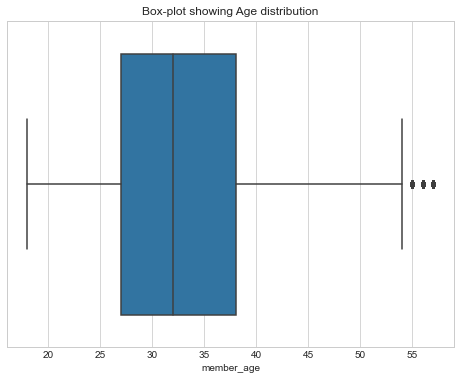

In [23]:
plt.figure(figsize=[8,6])
sb.boxplot(x=new_data['member_age'])
plt.title('Box-plot showing Age distribution');

## Interpretaion
Adjusting the outlier through the use of inter-quartile range moderated the outliers. The five point summary statistics values are clearly observed on the plot. The minimum age value is lesser than 20, the first quartile is less than 30, the median age is above 30 but lesser than 35. The Q3 is between 35-40 and the maximum age value is close to 55 years. There is indication of three outliers. 

#### I want to explore the time distribution of the bike riding based on hourly, days and month, 

In [13]:
# To extract the days, and 24 hours time usage
bike_copy['days'] = bike_copy['start_time'].dt.day_name()
bike_copy['hour'] = bike_copy['start_time'].dt.hour

In [14]:
## printing the frequecy counts of each variables (days, hour) created above
print(bike_copy['days'].value_counts())
print(bike_copy['hour'].value_counts())

Thursday     33733
Tuesday      30616
Wednesday    28456
Friday       27682
Monday       25686
Sunday       14532
Saturday     14442
Name: days, dtype: int64
17    20921
8     20242
18    16133
9     15221
16    13492
7     10235
19     9432
15     8657
12     8237
13     8118
10     7980
14     7694
11     7473
20     6220
21     4401
6      3294
22     2793
23     1573
0       893
5       866
1       525
2       356
4       227
3       164
Name: hour, dtype: int64


#### Frequecny distribution for days and hourly ride

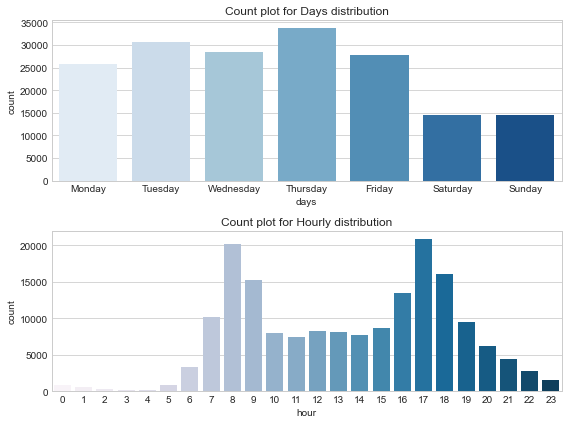

In [15]:
##Exploring the daily and hourly distrution of the bike sharing data
fig, ax = plt.subplots(nrows=2, figsize=[8,6])
sb.countplot(x='days', data = bike_copy, ax = ax[0], palette='Blues', 
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sb.countplot(x='hour', data = bike_copy , ax=ax[1], palette ='PuBu')
ax[0].set_title('Count plot for Days distribution')
ax[1].set_title('Count plot for Hourly distribution')
plt.tight_layout();

### Interpretaion 
The frequency count plot shows that the bike rentage occurs mostly on thurdays comapred to other days of the week. Also, bike rentage as observed are frequent in days like Wednessday, Tuesday, friday and Monday respectively but less frequent on Saturday and Sundays. A trip can go as long as 24hrs and no trip has ever been lesser thn 5 hours based on the results produced in the hourly frequency plot.

#### I want to explore the distribution of both the start and end stations used by the bike riders

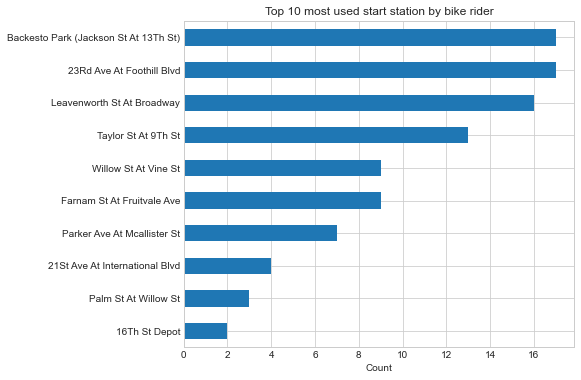

In [27]:
## creating barplot for the top 10 most used stations for start
plt.figure(figsize=[7,6])
bike_copy['start_station_name'].str.title().value_counts(ascending = True).head(10).plot(kind='barh')
plt.title('Top 10 most used start station by bike rider')
plt.xlabel('Count');

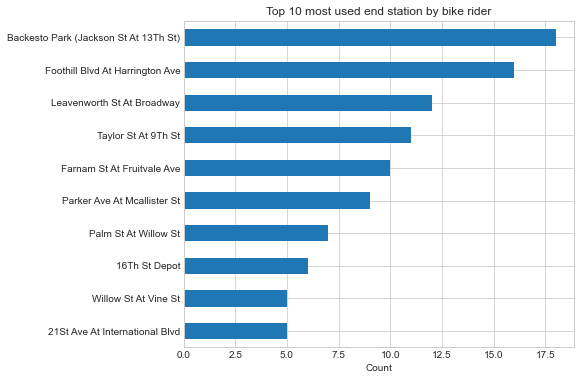

In [28]:
## creating barplot for the top 10 most used stations for end
plt.figure(figsize=[7,6])
bike_copy['end_station_name'].str.title().value_counts(ascending =True).head(10).plot(kind='barh')
plt.title('Top 10 most used end station by bike rider')
plt.xlabel('Count');

### Interpretation
The highest used starting route by riders based on analysis is 23rd Ave at International Blvd while the lowest 10 cyclist start route is 16th St Depot. For the end route, cyclist end their trip most times using the Faman St At Fruitvale Ave park and the least used end route out of 10 ranking was Willow St At Vine St.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the ride duration per seconds shows a highly skewed with a right long tail distribution. So i changed the time reference to minutes by diving by 60 and also use a klog transform. Exploring the log transformtion of the per minute ride duration, I observed that the distribution becomes normal with an average minutes of 12.5

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Investigating the numerical features, particularly members age, there are quite number of zeros enteries as well as gross outliers. This could likely occured due to some missing entries in the birth years. To reduce the effect of the zeros and outlier on the analysis, the zeros were filtered off and the outliers below the upper limit and lower limit removed. 

## Bivariate Exploration


#### I want to begin the bivariate analysis by looking at relationship or correlation between pairs of features 

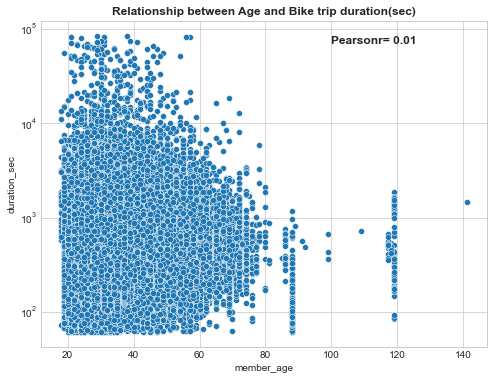

In [29]:
## To examine the relationship between age and duration of bike in sec 
#bike_copy = bike.query('member_age!=0')
corr = np.corrcoef(bike_copy['member_age'],bike_copy['duration_sec'])[0,1] ## calculating the correlation coefficient 
plt.figure(figsize=[8,6])
sb.scatterplot(x="member_age",y="duration_sec",data=bike_copy)
plt.annotate('Pearsonr= %.2f'%(corr), xy = (100,70000), 
              fontsize = 12, fontweight='bold')
plt.title('Relationship between Age and Bike trip duration(sec)', fontweight='bold')
plt.yscale('log');

### Interpretaion
The satterplot shows the relationship between the riders age and the duration of ride per seconds. A positive relationship can be observed between the duration and members age. This implies that increase in age could psooibly results into increase in ride frequency. 

In [16]:
## Plotting bike duration per minutes based on Age categorization
## categorizing age into Silent, Boomers, Gen-X, Millennials, Gen-Z
def age_cat(col):
    if (col>=1878 and col <=1946):
        return('Silent')
    elif (col>=1946 and col <=1964):
        return("Boomers")
    elif (col>=1965 and col <=1980):
        return("GenX")
    elif (col>=1981 and col <=1996):
        return("Millennials")
    else: 
        return('GenZ')

In [20]:
bike_copy['Age_category']= bike_copy['member_birth_year'].apply(age_cat)

In [37]:
## Define a function for box ploting 
def box_plot(x,y,df):
    """Bivariate box-plot"""
    ##Setting the plot size
    plt.figure(figsize=[8,6])
    ##Plot the bix plot
    sb.boxplot(x,y,data=df)
    ##Set plot title 
    plt.title(f'Trip duration by {x}'.title(), weight ='bold')
    ## Set x label 
    plt.xlabel(x.title(), weight='bold')
    ## Set y label
    plt.ylabel(y.title(), weight ='bold')
    ##Log transform the y scale 
    plt.yscale("log")

#### Distrbution of users age by ride duration? 

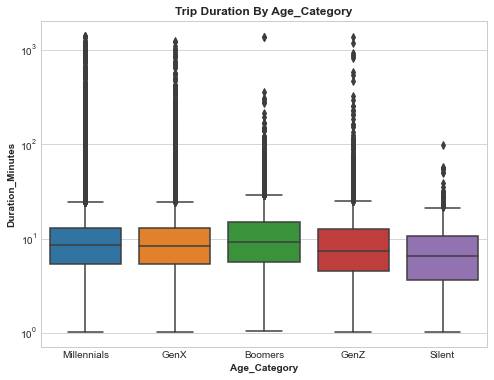

In [38]:
box_plot('Age_category','duration_minutes',bike_copy)

### Interpretation
In order to gain a robust insight on the distribution of members age with respect to ride frequnecy. The ages were distributed into 5 categories. The boxplot shows that riders within the age bracket of 1946-1964 had the slightly higher ride frequency compared to the Millennials and the GenX respectively. The silent which of course are the oldest members has the least ride frequency.  

#### Ride frequency by User type?

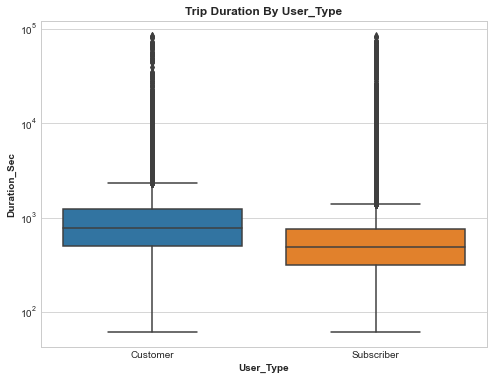

In [39]:
## To examine the relationship between bike ride duration and some categorical variables using boxplot
box_plot('user_type','duration_sec',bike_copy)

### Interpretaion
Exploring the ride frquency based on user type, registered users tends to have higher ride duration than than casual or subscriber users.

#### Ride duration by gender?

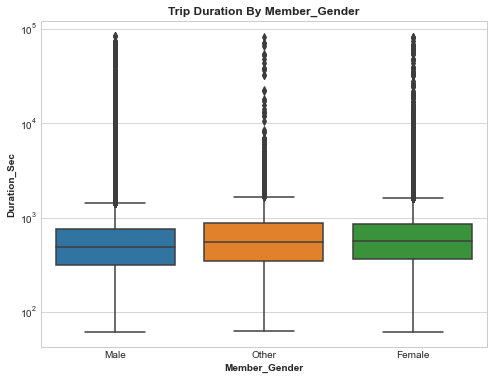

In [40]:
### A box plot of members age and ride frequency
box_plot('member_gender','duration_sec',bike_copy)

### Interpretation
The distribution of gender based on ride duration shows that the duration for bike riding among the three levels of gender are approximatley the same.  

#### What's the relationship between gender and bike user type?

In [35]:
## To examine the relationship or association betwen Bike rider users and their age category
crosstab_age_user = pd.crosstab(bike_copy['Age_category'], bike_copy['user_type'])

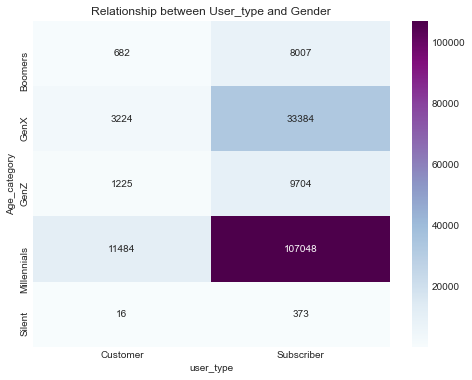

In [36]:
##Visualizing the crosstab 
plt.figure(figsize =[8,6])
sb.heatmap(crosstab_age_user, cmap = 'BuPu', annot= True, fmt='g')
plt.title('Relationship between User_type and Gender');

### Interpretation
Majority of the customers and subscriber belongs to the Millennials age category followed by the Genx. It's interesting to note that despite the relatively low frequency of the boomers, they had a higher ride duration that other age group as revealed by preceeding analysis.

#### What's the relationship between Users gender and user type?

In [37]:
##Checking relationship between gender and user type
crosstab = pd.crosstab(bike_copy['member_gender'], bike_copy['user_type'])

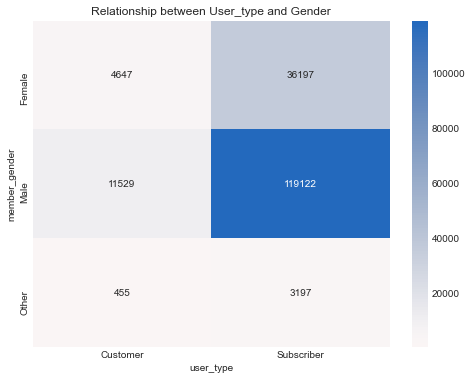

In [38]:
##Visualizing the crosstab 
plt.figure(figsize =[8,6])
sb.heatmap(crosstab, annot=True, cmap = 'vlag_r', center = 0, fmt = 'g')
plt.title('Relationship between User_type and Gender');

#### I want to explore the ride frequency based on the hours of the day 

In [41]:
##Extarcting time from  the start_time variable  
time= bike_copy['start_time'].dt.time

## Converting the tim into a 12 hours time format
#bike_copy['12hrs_time']= time.apply(lambda x: x.strftime("%I:%M %p"))

##Extracting only the minutes in AM/PM from the time 
bike_copy['Start_time_period'] = time.apply(lambda x: x.strftime("%I %p"))

# to remove the unwanted space
bike_copy['Start_time_period']=bike_copy['Start_time_period'].apply(lambda x:x.replace(" ",""))

In [47]:
## Creating a cross tab to obtain the ride frequency
crosstab_freq = pd.crosstab(bike_copy['Start_time_period'], bike_copy['days'])
crosstab_freq= crosstab_freq.reindex(columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
crosstab_freq

days,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Start_time_period,,,,,,,
01AM,79,44,161,98,45,53,45
01PM,1083,1044,1361,1404,1180,1088,958
02AM,63,40,74,88,29,33,29
02PM,909,915,1335,1369,1133,1081,952
03AM,29,20,26,36,21,17,15


#### What's the ride frequency per hour in the days?

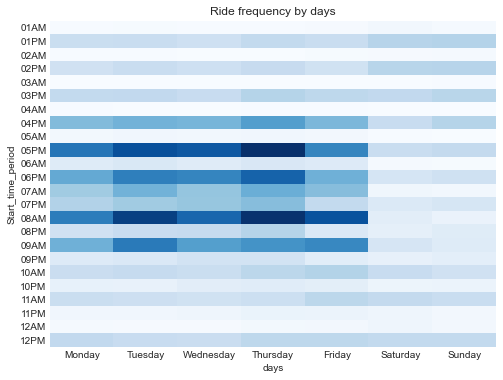

In [55]:
## Plot of ride frequency
plt.figure(figsize =(8,6))
sb.heatmap(crosstab_freq,cmap="Blues", cbar = False)
plt.title('Ride frequency by days');

### Interpretation
5PM and 8AM are observed to be the most popular hours for using the Ford GoBike. Also, Mid-weeks tends to have higher frequency ride compared to weekends which are litte or less popular during the peak ride hours. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Age has a very weak but positive relationship with ride duration which is quite suprising. One would expect that younger riders should have a longer ride duration against what was observed from the scatter plot which showed that the higher the advancement in age the higher the likelihood of ride duration per seconds. 

Also, there was an interesting relationship oberved between bike users and duration frequency. Despite the wide margin in the number of subscribers compared to customers, result  from the box plot shows that bike users that are just customers enjoys higher ride duration than subscribers. 

Interestingly, users within the age bracket of 45-64 (boomers) tends to also enjoy higher ride duration per seconds than the Millennials, GenX and GenZ who are within the age bracket lesser than the boomers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There tends to be more subcribers categorized as millennials and GenX than other age categories. Also, the frequency of Male that are subscribers far more than other categories.


## Multivariate Exploration


#### I want to determine the famous routes based on ride frequency per minutes

In [42]:
##joining the two routes together both end and start
bike_copy['combined_route'] = bike_copy['start_station_name'] + '-' + bike_copy['end_station_name']

In [43]:
##Creating a groupy based on the route and duration_minutes
byroute = bike_copy[['duration_minutes','combined_route']].groupby('combined_route')   #  ['cmbined_route'].value_counts()['']

In [44]:
##Aggregating the groupby using the mean
byroute= byroute.mean().sort_values(by = 'duration_minutes', ascending= False).reset_index()

## Spliting the Combined route to Start and End date 
byroute['start_route'], byroute['end_route'] =byroute['combined_route'].str.split('-',1).str

##Extracting the top 10 route based on the average ride per minutes
byroute = byroute[:10]

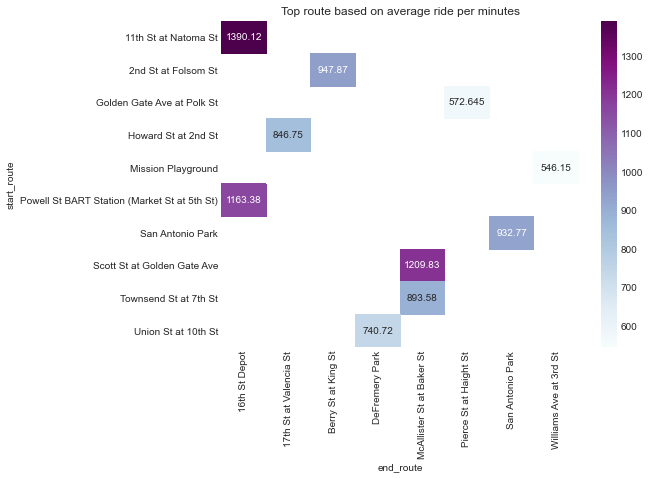

In [45]:
## Transforming the datafram into a pivot table 
pivot_route = byroute.pivot_table(index = 'start_route', columns = 'end_route', values = 'duration_minutes')

## Visualizing the top 10 route based on average ride per minutes
plt.figure(figsize=[8,6])
sb.heatmap(pivot_route, annot = True, fmt='g', cmap = 'BuPu')
plt.title('Top route based on average ride per minutes');

### Interpretation
The most common taken route based on average ride per minutes is between 11th St at Natoma St and 16th St Depot. follwed by Route between Scott St at Golden Gate Ave and McAllister St and Powell St BART staion and 16th St Depot. 

#### To examine the ride durations (minutes) per day and hour

In [46]:
## To explore the ride duration per minutes with respect to days and trip hour
data= bike_copy[['days','hour','duration_minutes']]
data

,days,hour,duration_minutes
0,Thursday,17,869.75
2,Thursday,12,1030.90
3,Thursday,17,608.17
4,Thursday,23,26.42
5,Thursday,23,29.88
...,...,...,...
183407,Friday,0,8.00
183408,Friday,0,5.22
183409,Friday,0,2.35
183410,Friday,0,2.32


In [47]:
pivot = data.pivot_table(index= 'days', columns= 'hour', values = 'duration_minutes')

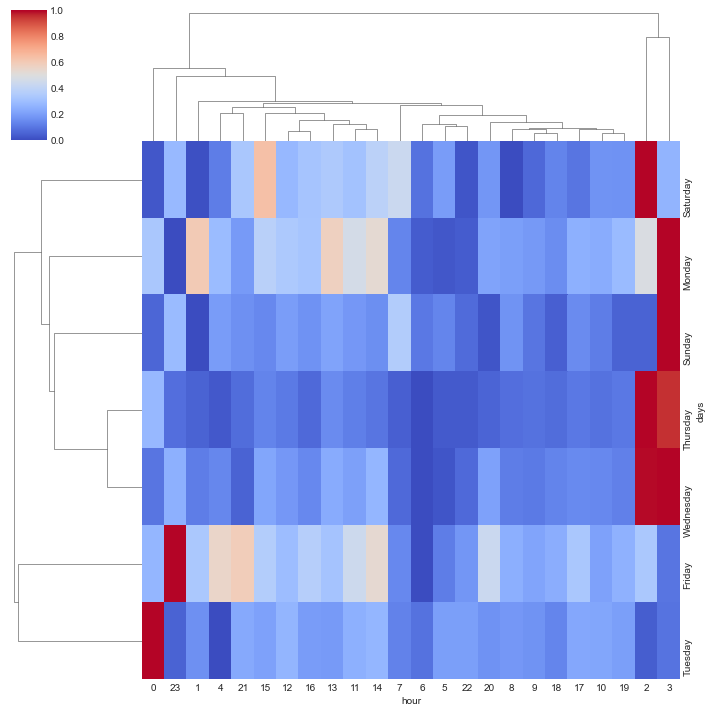

In [48]:
sb.clustermap(pivot, standard_scale=3,cmap='coolwarm')

### Interpretation
Ride frequency on Tuesday and Friday seems identical, Mid-weeks ride, Wednessday and Thursday are also identical in terms of duration per minutes. Ride frequeny in the hours of 2 and 3 takes longer duration especiall on wednessday and thurdays. Most of the Trips with longer duration on thursday usually starts during the first hour of the day.

In [49]:
### To examine the relationship btween gender, user_type and age category based on average ride duration
data = bike_copy[['member_gender','user_type','duration_minutes','Age_category']]
data.head()

,member_gender,user_type,duration_minutes,Age_category
0,Male,Customer,869.75,Millennials
2,Male,Customer,1030.90,GenX
3,Other,Subscriber,608.17,Millennials
4,Male,Subscriber,26.42,GenX
5,Male,Subscriber,29.88,Boomers


In [50]:
### Creating the two needed pivot tables 
pivot1 = data.pivot_table(index ='Age_category',columns = 'member_gender', values= 'duration_minutes')
pivot2 = data.pivot_table(index ='user_type',columns = 'member_gender', values= 'duration_minutes')

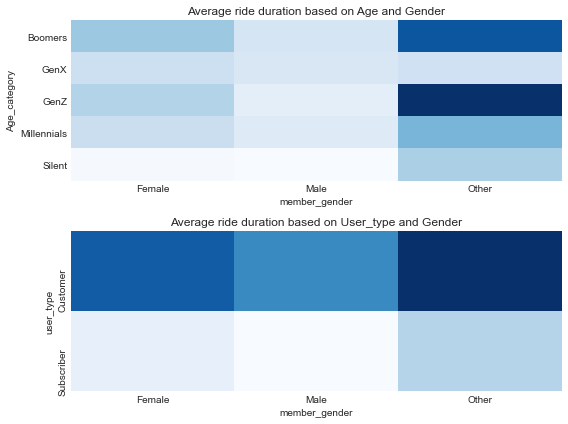

In [51]:
### Visualizing the pivot table
plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
sb.heatmap(pivot1, cbar = False, cmap = 'Blues')
plt.title('Average ride duration based on Age and Gender')
plt.subplot(2,1,2)
sb.heatmap(pivot2, cbar = False, cmap = 'Blues')
plt.title('Average ride duration based on User_type and Gender')
plt.subplot(2,1,2)
plt.tight_layout()

### Interpretation
The gender category other who belongs to the GenZ age group have higher duration of ride time on the average than other groups. Interestingly, Males which seems to be more in frquency distribution has lower average bike duration wacross all the age groups. Also, it can be observed from the second plot that registerd females bike users embark on longer trip on the average than the rigisted males. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate plot reveals that bike riders have longer trip duration during mid-weeks and at the very early hours of the days. 

Registed customers on the average embarks on longer trip than the subscribers. The GenZ with unspecified gender type embars on longer trip than other users.

### Were there any interesting or surprising interactions between features?

In terms of start and end route 1th St at Natoma St and 16th St Depot are the most popular route used by bikes based on trip duration. 

## Conclusions

This report seeks to analyse and explore the Ford GoBike dataeset. The dataset primarily contains 16 variables and some missing obervations. In order to achieve the goal of the analysis, some data wrngling efforts were made such as changing inapproprite datatypes, filling of missing values, flitering of zeros in age column among others. The analysis begins with a Univarite exploratory, followed by Bivarite and Multivarite exploratory analysis. Based on results gathered from all the analysis performed, it can be concluded that;

* Bike duration under log transformation gives a normal distribution curve. 

* There are more Male bike users than females and the other gender category. 

* Ford GoBike have significantly more subscribers than actual customers for bike rentages

* The exploratory result suggests that increase in age could result into higher ride durations for Ford Gobike users 

* Those between the ages of 46-65 specifically have higher trip duration frequency tha =n other age categories

* The starting hours for most riders is either 8am or 5pm and there is relatively highe frequency ride during mid-weeks compared to weekends

* The highest route in terms of ride time are 1th St at Natoma St for starting and 16th St Depot for trip ending. 


### References 

https://www.pewresearch.org/fact-tank/2019/01/17/where-millennials-end-and-generation-z-begins/

https://www.fordgobike.com/system-data